In [112]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import xgboost

# 컬럼명 정의
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# pandas로 데이터 읽기
data = pd.read_csv('xgboost/pima-indians-diabetes.csv', names=columns, dtype = float)

# X와 Y 분리
X = data.drop('Outcome', axis=1)  # 'Outcome' 열을 제외한 모든 열
Y = data['Outcome']  # 'Outcome' 열만 선택


seed = 7
test_size = 0.20
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = xgboost.XGBClassifier(max_depth=3)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.32%


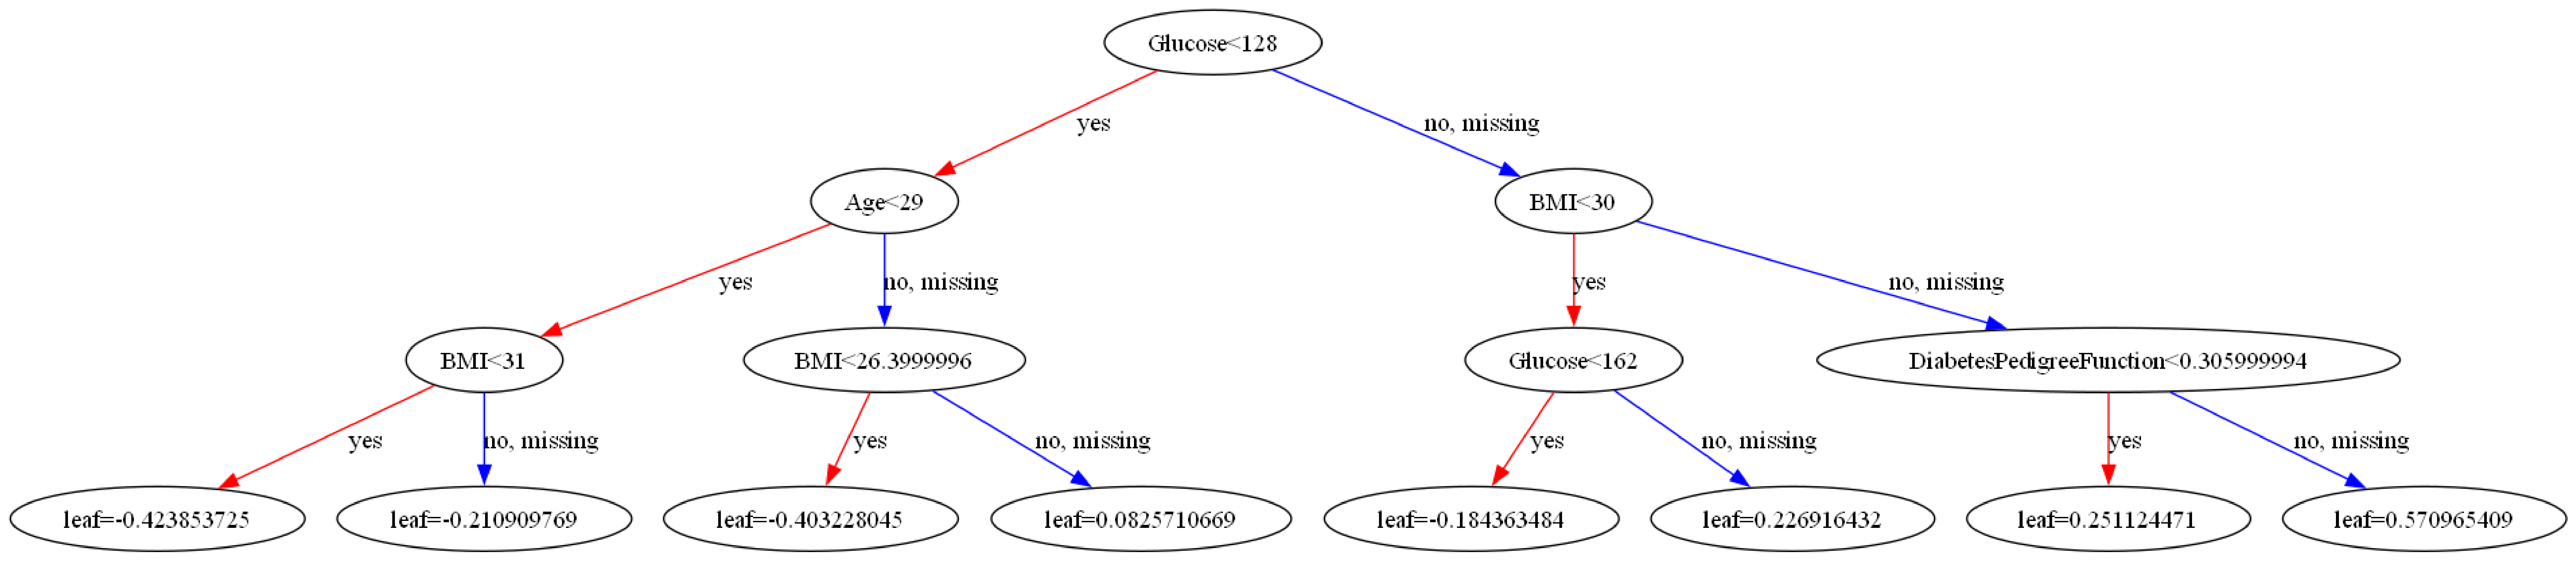

In [113]:
%matplotlib inline
import graphviz
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
rcParams['figure.figsize'] = (100, 100)

plot_tree(model, feature_names=feature_names)
plt.show()



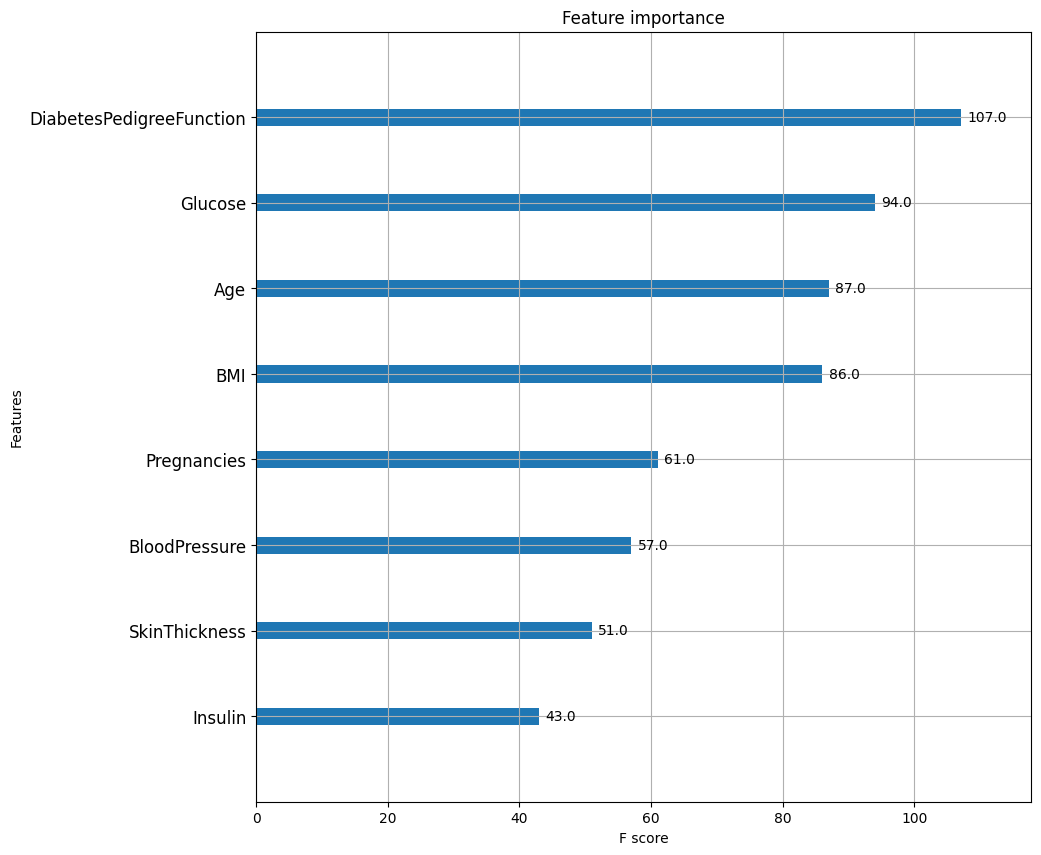

In [114]:
from xgboost import plot_importance
rcParams['figure.figsize'] = (10, 10)
plot_importance(model)
plt.yticks(fontsize=12)
plt.show()


In [128]:
from pdpbox import info_plots
copied = data.copy()
# 단일 feature에 대한 target plot
target = info_plots.TargetPlot(
    df=copied,
    feature='Glucose',
    feature_name='Glucose',
    target = 'Outcome'
)
fig, axes, summary_df = target.plot()
fig.show()



In [129]:
copied = data.copy()

predict = info_plots.PredictPlot(
    df=copied,
    feature='Glucose',
    feature_name='Glucose',
    model = model,
    model_features=list(data.drop('Outcome', axis=1).columns)
)
fig, axes, summary_df = predict.plot()
fig.show()

obtain pred_func from the provided model.


In [138]:
from pdpbox import pdp
copied = data.copy()
pdp_feature = pdp.PDPIsolate(
    df=copied,
    feature='BloodPressure',
    feature_name='BloodPressure',
    model = model,
    model_features=list(data.drop('Outcome', axis=1).columns)
)
fig, axes = pdp_feature.plot(plot_pts_dist=True)
fig.show()

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

In [131]:
target_interact = info_plots.InteractTargetPlot(
    df=copied,
    features = ['Glucose', 'BloodPressure'],
    feature_names = ['Glucose', 'BloodPressure'],
    target = 'Outcome'
)
fig, axes, summary_df = target_interact.plot()
fig.show()

In [137]:
pdp_interact = pdp.PDPInteract(
    df=copied,
    features = ['BloodPressure', 'Glucose'],
    feature_names = ['BloodPressure', 'Glucose'],
    model = model,
    model_features=list(data.drop('Outcome', axis=1).columns)
)
fig, axes = pdp_interact.plot(plot_pdp=True)
fig.show()

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]